-4.440892098500626e-16


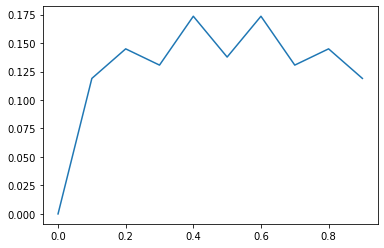

In [1]:
%matplotlib inline
import numpy as np
from  minimulti.electron.Hamiltonian import etb_model, atoms_model
from minimulti.electron.basis2 import BasisSet, gen_basis_set, atoms_to_basis
from ase.atoms import Atoms
import matplotlib.pyplot as plt

N=10
def run_1d_chain_1atom(t=1, nel=1):
    # generate structure.
    atoms=Atoms(symbols='H', positions=[(0,0,0)], cell=[1,1,1])
    # generate basis set
    bset= atoms_to_basis(atoms, basis_dict={'H': ('s',)}, nspin=2)
    # generate model
    mymodel=atoms_model(atoms=atoms, basis_set=bset, nspin=2)

    # onsite energy (tune v to make electron localized on one site)
    #mymodel.set_onsite(v,0)
    #mymodel.set_onsite(v,1)

    # 1D hopping along z. Format: t, i, j, R.
    # spin up
    mymodel.set_hop(t, 0,0, [0,0,1])
    # spin down
    mymodel.set_hop(t, 1,1, [0,0,1])

    mymodel.set_hop(t, 0,0, [0,1,0])
    # spin down
    mymodel.set_hop(t, 1,1, [0,1,0])
    
    mymodel.set_hop(t, 0,0, [1,0,0])
    # spin down
    mymodel.set_hop(t, 1,1, [1,0,0])
    
    mymodel.set(nel=nel, mixing=0.5, tol_energy=1e-8, tol_rho=1e-8, sigma=0.1)
    mymodel.set_Hubbard_U(Utype='Dudarev', Hubbard_dict={'H':{'U':0, 'J':0}})

    # K mesh.
    mymodel.set_kmesh([N,N,N])

    # Scf solve
    mymodel.scf_solve(print_iter_info=False)
    efermi=mymodel.get_fermi_level()
    print(efermi)
    qlist=np.zeros(( N,3), dtype=float)
    #qlist[:,1]=np.arange(0.0, 1.0, 1.0/10)+1.0/10
    #qlist[:,1]=4/N
    #qlist[:,0]=4/N
    qlist[:,2]=np.arange(0.0, 1.0, 1.0/N)
    return mymodel.calc_chi0_list(qlist=qlist)
x=np.arange(0.0, 1.0, 1.0/N)
chi=run_1d_chain_1atom()
plt.plot(x, -chi)
plt.show()